In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

import random
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

from pprint import pprint
import functools as ft

from graphviz import Digraph

DIR_HOME = os.environ['HOME']
DIR_REPOS = DIR_HOME + "/neo-human/repos"
DIR_BMLSP = DIR_REPOS + "/luispedro/BuildingMachineLearningSystemsWithPython"

initialization
$
\newcommand{\Brace}[1]{\left\{#1\right\}}
\newcommand{\Bracket}[1]{\left[#1\right]}
\newcommand{\cases}[1]{\begin{cases}#1\end{cases}}
\newcommand{\cov}[1]{\text{cov} \sigma\left[#1\right]}
\newcommand{\diff}[2]{\frac{d #1}{d #2}}
\newcommand{\difftwo}[2]{\frac{d^2 #1}{d {#2}^2}}
\newcommand{\diffn}[2]{{#1}^{\prime}(#2)}
\newcommand{\ds}{\displaystyle}
\newcommand{\E}[1]{\mathbb{E}\left[ #1 \right]}
\newcommand{\expb}[1]{\exp\left\{#1\right\}} 
\newcommand{\EXP}[1]{\exp\left\{#1\right\}} 
\newcommand{\frachalf}[1]{\frac{#1}{2}~}
\newcommand{\fracone}[1]{\frac{1}{#1}~}
\newcommand{\fracrec}[1]{\frac{1}{#1}~}
\newcommand{\half}{\fracone{2}}
\newcommand{\H}[1]{\mathbb{H}\left[#1\right]}
\newcommand{\Int}[2]{\displaystyle \int_{#1}^{#2}~}
\newcommand{\intinfinf}{\Int{-\infty}{\infty}}
\newcommand{\inv}[1]{#1^{-1}}
\newcommand{\invp}[1]{\left({#1}\right)^{-1}}
\newcommand{\KL}[2]{\text{KL}\left(#1 \Vert #2\right)}
\newcommand{\Lim}[1]{\displaystyle \lim_{#1}}
\newcommand{\Ln}[1]{\ln \left\(#1\right\)}
\newcommand{\Lnb}[1]{\ln \left\{#1\right\} }
\newcommand{\Mod}[1]{\left|#1\right|}
\newcommand{\Norm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\Normsqr}[1]{\Norm{#1}^2}
\newcommand{\map}[1]{#1_{\text{MAP}}}
\newcommand{\ml}[1]{#1_{\text{ML}}}
\newcommand{\MI}[1]{\mathcal{I}\left(#1\right)}
\newcommand{\P}{\mathbb{P}}
\newcommand{\Paran}[1]{\left(#1\right)}
\newcommand{\Partial}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\sqrbrkt}[1]{\Bracket{#1}^2}
\newcommand{\sqrbrc}[1]{\Brace{#1}^2}
\newcommand{\trace}[1]{\text{Tr}\left( #1 \right)}
\newcommand{\traceb}[1]{\text{Tr}\left\{#1\right\}}
\newcommand{\underl}[1]{\text{$\underline{#1}$}}
\newcommand{\V}[1]{\mathbb{V}\left[#1\right]}
$
$
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$
$
\newcommand{\mat}[1]{ \left[ \begin{matrix} #1 \end{matrix} \right] }
\newcommand{\matp}[1]{ \left( \begin{matrix} #1 \end{matrix} \right)}
\newcommand{\mats}[1]{ \begin{matrix}#1\end{matrix} }
\newcommand{\arrthree}[1]{
\begin{array}{rlr} #1 \end{array}}
$

$
\newcommand{\C}{\mathbb{C}}
\newcommand{\Ca}{\mathcal{C}}
\newcommand{\Caone}{\Ca_1}
\newcommand{\Catwo}{\Ca_2}
\newcommand{\Cak}{\Ca_k}
\newcommand{\D}{\mathcal{D}}
\newcommand{\G}{\mathcal{G}}
\newcommand{\I}{\mathcal{I}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\M}{\mathcal{M}}
\newcommand{\N}{\mathbb{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\Ra}{\mathcal{R}}
$
$
\newcommand{\commentgray}[1]{\color{gray}{\text{#1}}}
$

sum, product
$
\newcommand{\sumi}{\displaystyle \sum_i}
\newcommand{\sumiD}{\displaystyle \sum_{i=1}^{D}}
\newcommand{\sumiL}{\displaystyle \sum_{i=1}^{L}}
\newcommand{\sumiN}{\displaystyle \sum_{i=1}^{N}}
\newcommand{\sumjD}{\displaystyle \sum_{j=1}^{D}}
\newcommand{\sumjK}{\displaystyle \sum_{j=1}^{K}}
\newcommand{\sumjMl}{\sum_{j=1}^{M-1}}
\newcommand{\sumkK}{\displaystyle \sum_{k=1}^{K}}
\newcommand{\sumkM}{\displaystyle \sum_{k=1}^{M}}
\newcommand{\sumkMl}{\sum_{k=1}^{M-1}}
\newcommand{\sumkp}{\displaystyle \sum_{k=1}^{p}}
\newcommand{\summN}{\displaystyle \sum_{m=1}^{N}}
\newcommand{\sumnN}{\displaystyle \sum_{n=1}^{N}}
$
$
\newcommand{\prodi}{\displaystyle \prod_i}
\newcommand{\prodiD}{\displaystyle \prod_{i=1}^{D}}
\newcommand{\prodiL}{\displaystyle \prod_{i=1}^{L}}
\newcommand{\prodiN}{\displaystyle \prod_{i=1}^{N}}
\newcommand{\prodjK}{\displaystyle \prod_{j=1}^{K}}
\newcommand{\prodkK}{\displaystyle \prod_{k=1}^{K}}
\newcommand{\prodmN}{\displaystyle \prod_{m=1}^{N}}
\newcommand{\prodnN}{\displaystyle \prod_{n=1}^{N}}
$

alphabet shortcuts
$
\newcommand{\ab}{\mathbf{a}}
\newcommand{\at}{\ab^T}
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\At}{\Ab^T}
\newcommand{\Ai}{\inv{\Ab}}
\newcommand{\Abjk}{\Ab_{jk}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bt}{\bb^T}
\newcommand{\Bb}{\mathbf{B}}
\newcommand{\Bt}{\Bb^T}
\newcommand{\Cb}{\mathbf{C}}
\newcommand{\Cn}{\Cb_{N}}
\newcommand{\Db}{\mathbf{D}}
\newcommand{\fb}{\mathbf{f}}
\newcommand{\fp}{f^{\prime}}
\newcommand{\Hb}{\mathbf{H}}
\newcommand{\hx}{h(\xb)}
\newcommand{\Jb}{\mathbf{J}}
\newcommand{\kb}{\mathbf{k}}
\newcommand{\kt}{\kb^T}
\newcommand{\Kb}{\mathbf{K}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lt}{\Lb^T}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\mt}{\mb^T}
\newcommand{\mbn}{\mb_N}
\newcommand{\mbnt}{\mbn^T}
\newcommand{\mbN}{\mb_N}
\newcommand{\mbNt}{\mbn^T}
\newcommand{\Mb}{\mathbf{M}}
\newcommand{\Qb}{\mathbf{Q}}
\newcommand{\Rb}{\mathbf{R}}
\newcommand{\sb}{\mathbf{s}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\tbnn}{\tb_{N}}
\newcommand{\tbnp}{\tb_{N+1}}
\newcommand{\tt}{\tb^T}
\newcommand{\Tb}{\mathbf{T}}
\newcommand{\Tt}{\Tb^T}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\Ub}{\mathbf{U}}
\newcommand{\Ut}{\Ub^T}
\newcommand{\vb}{\mathbf{v}}
\newcommand{\Vb}{\mathbf{V}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wnr}[1]{\wb^{(\text{#1})}}
\newcommand{\wt}{\wb^T}
\newcommand{\Wb}{\mathbf{W}}
\newcommand{\Wt}{\Wb^T}
\newcommand{\Wtilde}{\widetilde{\Wb}}
\newcommand{\Wtildet}{\Wtilde^T}
\newcommand{\Xb}{\mathbf{X}}
\newcommand{\Xt}{\Xb^T}
\newcommand{\Xk}{\Xb_k}
\newcommand{\Xkt}{\Xk^T}
\newcommand{\Xtilde}{\widetilde{\Xb}}
\newcommand{\Xtildet}{\Xtilde^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\xt}{\xb^T}
\newcommand{\xtilde}{\widetilde{\xb}}
\newcommand{\xtilden}{\xtilde_n}
\newcommand{\xtildent}{\xtilden^T}
\newcommand{\xp}{x^{\prime}}
\newcommand{\xbp}{\xb^{\prime}}
\newcommand{\xbm}{\xb_m}
\newcommand{\xbn}{\xb_n}
\newcommand{\xbnp}{\xb_{N+1}}
\newcommand{\xab}{\mathbf{x_a}}
\newcommand{\xabt}{\mathbf{x_a}^T}
\newcommand{\xbb}{\mathbf{x_b}}
\newcommand{\xbbt}{\mathbf{x_b}^T}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\yt}{\yb^T}
\newcommand{\yx}{y(\xb)}
\newcommand{\Yb}{\mathbf{Y}}
\newcommand{\Yt}{\Yb^T}
\newcommand{\zb}{\mathbf{z}}
\newcommand{\zt}{\zb^T}
\newcommand{\zbm}{\zb_m}
\newcommand{\zbn}{\zb_n}
\newcommand{\zbnp}{\zb_{n-1}}
\newcommand{\znk}{\zb_{nk}}
\newcommand{\znpj}{\zb_{n-1,j}}
\newcommand{\Zb}{\mathbf{Z}}
$

math shortcuts
$
\newcommand{\alphab}{\pmb{\alpha}}
\newcommand{\alphabt}{\alphab^T}
\newcommand{\betab}{\pmb{\beta}}
\newcommand{\betabp}{\betab^{\prime}}
\newcommand{\chib}{\boldsymbol{\chi}}
\newcommand{\etab}{\pmb{\eta}}
\newcommand{\etabp}{\etab^{\prime}}
\newcommand{\etat}{\eta^T}
\newcommand{\etabt}{\etab^T}
\newcommand{\Lambdab}{\pmb{\Lambda}}
\newcommand{\laa}{\Lambda_{aa}}
\newcommand{\laai}{\Lambda_{aa}^{-1}}
\newcommand{\lab}{\Lambda_{ab}}
\newcommand{\lba}{\Lambda_{ba}}
\newcommand{\lbb}{\Lambda_{bb}}
\newcommand{\lbbi}{\Lambda_{bb}^{-1}}
\newcommand{\li}{\Lambda^{-1}}
\newcommand{\Li}{\Lambda^{-1}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\mut}{\mub^T}
\newcommand{\muab}{\pmb{\mu}_a}
\newcommand{\mubb}{\pmb{\mu}_b}
\newcommand{\Phib}{\pmb{\Phi}}
\newcommand{\Phibt}{\Phib^T}
\newcommand{\pib}{\pmb{\pi}}
\newcommand{\sigmasqr}{\sigma^2}
\newcommand{\saa}{\Sigma_{aa}}
\newcommand{\sab}{\Sigma_{ab}}
\newcommand{\sba}{\Sigma_{ba}}
\newcommand{\sbb}{\Sigma_{bb}}
\newcommand{\Sigmai}{\inv{\Sigma}}
\newcommand{\thetab}{\pmb{\theta}}
\newcommand{\thetat}{\thetab^T}
\newcommand{\thetabh}{\hat{\thetab}}
\newcommand{\thetaold}{\thetab^{\text{old}}}
$
$
\newcommand{\zerob}{\pmb{0}}
\newcommand{\oneb}{\pmb{1}}
\newcommand{\ed}{\mathbb{E}_{\D}}
\newcommand{\edyx}{\ed\left[y(\xb ; \D)\right]}
\newcommand{\dx}{~dx}
\newcommand{\dxb}{~d\xb}
\newcommand{\pxdxb}{p(\xb) \dxb}
\newcommand{\dwb}{~d\wb}
$

aliases for distributions
$\newcommand{\multivarcoeff}{\frac{1}{(2\pi)^{D/2}}
\frac{1}{\left| \mathbf{\Sigma}\right|^{1/2}}}$
$\newcommand{\multivarexp}[2]
{
\left\{
 -\frac{1}{2} 
 {#1}^T 
 #2
 {#1}
\right\}
}$
$\newcommand{\multivarexpx}[1]{\multivarexp{#1}{\Sigma^{-1}}}$
$\newcommand{\multivarexpstd}{\multivarexpx{(\xb-\mub)}}$
$\newcommand{\gam}{\operatorname{Gam}}$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\Nstdx}{\Nl{\mathbf{x}}{\mathbf{\mu}}{\Sigma}}
$

In [6]:
HTML("<style>"\
    "div.cell{"\
        "width:100%;"\
        "margin-left:0%;"\
        "margin-right:auto;"\
    "}"\
"</style>")

# ndarray

In [8]:
data = np.array([[random.random() for _ in range(3)] for _ in range(2)])
data

array([[ 0.65531237,  0.10125848,  0.34641902],
       [ 0.87293747,  0.16027756,  0.35282797]])

In [9]:
data.shape

(2, 3)

In [10]:
data.dtype

dtype('float64')

In [11]:
data.ndim

2

## creating ndarray

| cmd | desc |
| -- | -- |
| array | Convert input data (list, tuple, array, or other sequence type) to an ndarray either by inferring a dtype or explicitly specifying a dtype. Copies the input data by default. |
|asarray |Convert input to ndarray, but do not copy if the input is already an ndarray
|arange | Like the built-in range but returns an ndarray instead of a list.
|ones, ones_like | Produce an array of all 1’s with the given shape and dtype. ones_like takes another array and produces a ones array of the same shape and dtype. |
| empty, empty_like | Create new arrays by allocating new memory, but do not populate with any values like ones and zeros |
| eye, identity | Create a square N x N identity matrix (1’s on the diagonal and 0’s elsewhere) |

## data types for ndarrays

| type | typecode | desc |
| -- | -- | -- |
| int8, uint8 |  i1, u1 | Signed and unsigned 8-bit (1 byte) integer types |
| int16, uint16 |  i2, u2 | Signed and unsigned 16-bit integer types |
| int32, uint32 |  i4, u4 | Signed and unsigned 32-bit integer types |
| int64, uint64 |  i8, u8 | Signed and unsigned 32-bit integer types |
| float16 | f2 |  Half-precision floating point |
| float32 | f4 or f | Standard single-precision floating point. Compatible with C float |
| float64, float128 |  f8 or | d Standard double-precision floating point. Compatible with C double and Python float object |
| float128 | f16 or g | Extended-precision floating point |
| complex64, complex128, complex256 | c8, c16, c32 | Complex numbers represented by two 32, 64, or 128 floats, respectively |
| bool | ?  | Boolean type  storing True and False values |
| object | O | Python object type |
| string_ | S | Fixed-length string type (1 byte per character). For example, to create a string dtype with length 10, use 'S10' . |
| unicode_ | U | Fixed-length unicode type (number of bytes platform specific). Same specification semantics as string_ (e.g. 'U10' ). |

### casting

In [6]:
arr = np.array([1,2,3])
print('arr type:', arr.dtype)
print('arr:', arr)

arr type: int64
arr: [1 2 3]


In [7]:
arr_float = arr.astype(np.float64)
print('arr_float type:', arr_float.dtype)
print('arr_float:', arr_float)

arr_float type: float64
arr_float: [ 1.  2.  3.]


#### strings to numeric

In [13]:
list_str = ['1.25', '-9.6', '42']
arr_str = np.array(list_str)
arr_str

array(['1.25', '-9.6', '42'], 
      dtype='<U4')

In [17]:
arr_str.astype(float)

array([  1.25,  -9.6 ,  42.  ])

#### side note
see how the floating point conversion wavers around the actual value

In [26]:
arr_str.astype(np.float16)[1]

-9.6016

In [27]:
arr_str.astype(np.float32)[1]

-9.6000004

In [28]:
arr_str.astype(np.float64)[1]

-9.5999999999999996

In [29]:
arr_str.astype(np.float)[1]

-9.5999999999999996

### can use other arrays dtype as well

In [30]:
arr_1 = np.arange(10)
print('arr_1 type:', arr_1.dtype)

arr_1 type: int64


In [31]:
arr_2 = np.arange(10, dtype=np.float64)
arr_1.astype(arr_2.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

Calling astype always creates a new array (a copy of the data), even if the new dtype is the same as the old dtype.

## Operations between Arrays and scalars

vectorization: batch operations on data w/o any for loops

## basic indexing and slicing

In [33]:
arr1 = np.arange(10)

broadcast assignment

In [34]:
arr1[5:8] = 12
arr1

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

array slices are views.  
any modification of that will change the original as well

In [39]:
arr2 = arr1[1:4]
arr2[2] = 30

arr1

array([ 0,  1,  2, 30,  4, 12, 12, 12,  8,  9])

to copy the slice, `copy()` has to be mentioned explicitly

In [40]:
arr3 = arr1[1:4].copy()
arr3[:] = 4444
arr1

array([ 0,  1,  2, 30,  4, 12, 12, 12,  8,  9])

### 2D arrays

In [47]:
arr2d = np.array([[3*row+col+1 for col in range(3)] for row in range(3)])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

two ways of accessing elements

In [48]:
print('arr2d[0][2]: ',arr2d[0][2])
print('arr2d[0,2]: ',arr2d[0,2])

arr2d[0][2]:  3
arr2d[0,2]:  3


### nD arrays

In [57]:
arr3d = np.array([[[2*3*d1+3*d2+d3+1 for d3 in range(3)] for d2 in range(2)] for d1 in range(2)])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

assignment broadcasting

In [58]:
old_vals = arr3d[0].copy()
old_vals

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
arr3d[0] = 64
arr3d

array([[[64, 64, 64],
        [64, 64, 64]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [60]:
arr3d[0] = old_vals
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

slicing in nD

In [61]:
arr3d[1,0]

array([7, 8, 9])

### indexing with slices

In [65]:
arr3d = np.array([[[5*4*d1+4*d2+d3+1 for d3 in range(4)] for d2 in range(5)] for d1 in range(6)])
arr3d

array([[[  1,   2,   3,   4],
        [  5,   6,   7,   8],
        [  9,  10,  11,  12],
        [ 13,  14,  15,  16],
        [ 17,  18,  19,  20]],

       [[ 21,  22,  23,  24],
        [ 25,  26,  27,  28],
        [ 29,  30,  31,  32],
        [ 33,  34,  35,  36],
        [ 37,  38,  39,  40]],

       [[ 41,  42,  43,  44],
        [ 45,  46,  47,  48],
        [ 49,  50,  51,  52],
        [ 53,  54,  55,  56],
        [ 57,  58,  59,  60]],

       [[ 61,  62,  63,  64],
        [ 65,  66,  67,  68],
        [ 69,  70,  71,  72],
        [ 73,  74,  75,  76],
        [ 77,  78,  79,  80]],

       [[ 81,  82,  83,  84],
        [ 85,  86,  87,  88],
        [ 89,  90,  91,  92],
        [ 93,  94,  95,  96],
        [ 97,  98,  99, 100]],

       [[101, 102, 103, 104],
        [105, 106, 107, 108],
        [109, 110, 111, 112],
        [113, 114, 115, 116],
        [117, 118, 119, 120]]])

In [66]:
arr3d[:2]

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12],
        [13, 14, 15, 16],
        [17, 18, 19, 20]],

       [[21, 22, 23, 24],
        [25, 26, 27, 28],
        [29, 30, 31, 32],
        [33, 34, 35, 36],
        [37, 38, 39, 40]]])

In [70]:
arr3d[:2,1:3,1:3]

array([[[ 6,  7],
        [10, 11]],

       [[26, 27],
        [30, 31]]])

## Boolean Indexing

In [73]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7,4)
data

array([[ 0.2384445 , -0.05329493, -1.61258779,  2.67101782],
       [ 1.37447635,  0.62276754, -1.53955296,  0.6547336 ],
       [-0.26076456,  0.66054252,  0.14115081,  0.94954027],
       [-1.61774107,  2.85389276,  0.7277868 , -1.05471496],
       [ 1.0229705 , -0.16667093, -1.1854888 , -0.41919097],
       [-1.49189108,  1.24760617,  0.06064105, -0.11872986],
       [-0.64098681, -0.03981597,  0.43077147,  0.19134194]])

Boolean indices

In [74]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [75]:
data[names == 'Bob']

array([[ 0.2384445 , -0.05329493, -1.61258779,  2.67101782],
       [-1.61774107,  2.85389276,  0.7277868 , -1.05471496]])

Combining boolean indexing and slicing

In [76]:
data[names == 'Bob',1:3]

array([[-0.05329493, -1.61258779],
       [ 2.85389276,  0.7277868 ]])

negations

In [78]:
data[~(names == 'Bob')]

array([[ 1.37447635,  0.62276754, -1.53955296,  0.6547336 ],
       [-0.26076456,  0.66054252,  0.14115081,  0.94954027],
       [ 1.0229705 , -0.16667093, -1.1854888 , -0.41919097],
       [-1.49189108,  1.24760617,  0.06064105, -0.11872986],
       [-0.64098681, -0.03981597,  0.43077147,  0.19134194]])

In [79]:
data[names != 'Bob']

array([[ 1.37447635,  0.62276754, -1.53955296,  0.6547336 ],
       [-0.26076456,  0.66054252,  0.14115081,  0.94954027],
       [ 1.0229705 , -0.16667093, -1.1854888 , -0.41919097],
       [-1.49189108,  1.24760617,  0.06064105, -0.11872986],
       [-0.64098681, -0.03981597,  0.43077147,  0.19134194]])

combining masks   
Use boolean arithmetic operators **&**, **|**.  
The python keywords **and**, **or** don't work w/ boolean arrays

In [82]:
data[((names == 'Bob') | (names == 'Will'))]

array([[ 0.2384445 , -0.05329493, -1.61258779,  2.67101782],
       [-0.26076456,  0.66054252,  0.14115081,  0.94954027],
       [-1.61774107,  2.85389276,  0.7277868 , -1.05471496],
       [ 1.0229705 , -0.16667093, -1.1854888 , -0.41919097]])

In [84]:
data[((names == 'Bob') | (names == 'Will'))]

array([[ 0.2384445 , -0.05329493, -1.61258779,  2.67101782],
       [-0.26076456,  0.66054252,  0.14115081,  0.94954027],
       [-1.61774107,  2.85389276,  0.7277868 , -1.05471496],
       [ 1.0229705 , -0.16667093, -1.1854888 , -0.41919097]])

setting all negative values to zero

In [87]:
data[data < 0] = 0
data

array([[ 0.2384445 ,  0.        ,  0.        ,  2.67101782],
       [ 1.37447635,  0.62276754,  0.        ,  0.6547336 ],
       [ 0.        ,  0.66054252,  0.14115081,  0.94954027],
       [ 0.        ,  2.85389276,  0.7277868 ,  0.        ],
       [ 1.0229705 ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.24760617,  0.06064105,  0.        ],
       [ 0.        ,  0.        ,  0.43077147,  0.19134194]])

indexing and broadcasting

In [89]:
data[names != 'Joe'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 1.37447635,  0.62276754,  0.        ,  0.6547336 ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  1.24760617,  0.06064105,  0.        ],
       [ 0.        ,  0.        ,  0.43077147,  0.19134194]])

## Fancy indexing

In [91]:
arr1 = np.empty((8,4))
for i in range(arr1.shape[0]): arr1[i] = i;
arr1

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

rows in the desired order: +ve indices

In [93]:
arr1[[4,3,0,6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

rows in the desired order: -ve indices

In [94]:
arr1[[-1,-3,-5,-7]]

array([[ 7.,  7.,  7.,  7.],
       [ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

multiple index arrays

In [96]:
arr2 = np.arange(32).reshape(8,4)
arr2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [97]:
arr2[[1,5,7,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [98]:
arr2[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

Quite intimidating   
This is not what one expects.   
What one expects is a rectangular region  
what this does is select **(1,0), (5,3), (7,1), (2,2)**

selecting rectangular regions: first way

In [101]:
arr2[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

selecting rectangular regions: second way

In [103]:
arr2[np.ix_([1,5,7,2],[0,3,1,2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

Fancy indexing, unlike slicing, always copies data into the new array

## Transposing array and swapping axes

Tranposing: special form of reshaping w/o copying anything

In [104]:
arr1 = np.arange(15).reshape((3,5))
arr1

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [105]:
arr1.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

New form of transpose

In [108]:
arr2 = np.arange(24).reshape((3,2,4))
arr2

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]],

       [[16, 17, 18, 19],
        [20, 21, 22, 23]]])

Mind bender, aint it?

In [109]:
arr2.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11],
        [16, 17, 18, 19]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15],
        [20, 21, 22, 23]]])

Transposing with **.T** is just a special case of swapping axes.  
ndarray has the method **swapaxes** which takes a pair of axis numbers

In [111]:
arr2.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]],

       [[16, 20],
        [17, 21],
        [18, 22],
        [19, 23]]])

**swapaxes** similarly returns a view on the day w/o making a copy

# Universal Functions: Fast Element-wise array functions

A universal function, or ufunc, is a function that performs elementwise operations on data in ndarrays.    
You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

In [113]:
arr1 = np.arange(10)
arr1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## examples

sqrt, exp are **unary** ufuncs

In [114]:
np.sqrt(arr1)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [123]:
np.exp(arr1)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

add, maximum are **binary** ufuncs

In [127]:
x,y = np.random.randn(8), np.random.randn(8)
x,y

(array([-0.1594104 ,  0.09566843,  0.62154702,  0.63521477,  0.02622966,
        -0.88646536, -0.1857161 , -0.25388813]),
 array([ 1.65357372, -0.21509509,  1.3489121 , -0.55702318, -0.77117631,
         0.2772107 ,  2.03784632, -0.89397081]))

In [128]:
np.add(x,y)

array([ 1.49416332, -0.11942666,  1.97045911,  0.07819159, -0.74494664,
       -0.60925466,  1.85213022, -1.14785894])

In [130]:
np.maximum(x,y)

array([ 1.65357372,  0.09566843,  1.3489121 ,  0.63521477,  0.02622966,
        0.2772107 ,  2.03784632, -0.25388813])

Then there are those returning multiple arrays back

In [132]:
arr3 = np.random.randn(7)*5
print(arr3)
np.modf(arr3)

[-2.36504818 -6.34149527 -4.94811328  2.60455724 -4.81262333 -0.02480237
  4.53485483]


(array([-0.36504818, -0.34149527, -0.94811328,  0.60455724, -0.81262333,
        -0.02480237,  0.53485483]), array([-2., -6., -4.,  2., -4., -0.,  4.]))

## unary ufuncs

| Function | Description |
| - | - |
| abs, fabs | Compute the absolute value element-wise for integer, floating point, or complex values. Use fabs as a faster alternative for non-complex-valued data |
| sqrt | Compute the square root of each element. Equivalent to arr ** 0.5 |
| square | Compute the square of each element. Equivalent to arr ** 2 |
| exp | Compute the exponent e x of each element |
| log , log10, log2, log1p | Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively |
| sign | Compute the sign of each element: 1 (positive), 0 (zero), or -1 (negative) |
| ceil | Compute the ceiling of each element, i.e. the smallest integer greater than or equal to each element |
| floor | Compute the floor of each element, i.e. the largest integer less than or equal to each element |
| rint | Round elements to the nearest integer, preserving the dtype |
| modf | Return fractional and integral parts of array as separate array |
| isnan | Return boolean array indicating whether each value is NaN (Not a Number) |
| isfinite , isinf | Return boolean array indicating whether each element is finite (non- inf , non- NaN ) or infinite, respectively |
| cos , cosh, sin, sinh, tan, tanh | Regular and hyperbolic trigonometric functions |
| arccos , arccosh, arcsin, arcsinh, arctan, arctanh | Inverse trigonometric functions |
| logical_not | Compute truth value of not x element-wise. Equivalent to -arr . |


## Binary ufuncs

| Function | Description |
| - | - |
| add | Add corresponding elements in arrays |
| subtract | Subtract elements in second array from first array |
| multiply | Multiply array elements |
| divide, floor_divide | Divide or floor divide (truncating the remainder) |
| power | Raise elements in first array to powers indicated in second array |
| maximum, fmax | Element-wise maximum. fmax ignores NaN |
| minimum, fmin | Element-wise minimum. fmin ignores NaN |
| mod | Element-wise modulus (remainder of division) |
| copysign | Copy sign of values in second argument to values in first argument |
| greater, greater_equal, less, less_equal, equal, not_equal | Perform element-wise comparison, yielding boolean array. Equivalent to infix operators $\gt, ~\ge, ~\lt, ~\le$, ==, != |
| logical_and, logical_or, logical_xor | Compute element-wise truth value of logical operation. Equivalent to infix operators $\&, |, \text{^}$ |

# Data processing using arrays

Vectorization: replacing explicit loops with array expressions

In [137]:
points = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points, points)
xs,ys

(array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        ..., 
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ..., 
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]]))

/home/dragon/.local/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


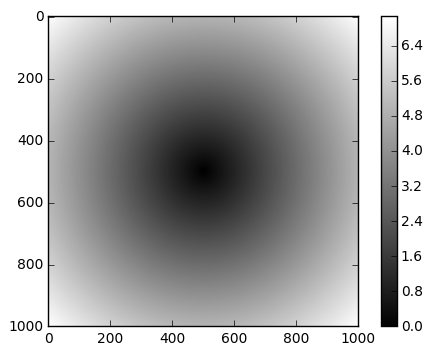

In [140]:
z = np.sqrt(xs**2 + ys**2)
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar(); plt.show()

## Expressing conditional logic as array operations

In [164]:
x = np.arange(1.1,1.6,0.1).repeat(50)
y = np.arange(2.1,2.6,0.1).repeat(50)
cond = np.array([True, False, True, True, False]).repeat(50)

Pure python way: slow

In [166]:
%timeit [(x if c else y) for x,y,c in zip(x,y,cond)]

10000 loops, best of 3: 30.3 µs per loop


numpy way: fast

In [168]:
%timeit np.where(cond, x, y)

The slowest run took 14.52 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.21 µs per loop


Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with -2.   
This is very easy to do with np.where

In [169]:
arr1 = np.random.randn(4,4)
arr1

array([[-1.08315221,  1.84321327, -0.58468899,  0.25218224],
       [-0.51725788,  0.12266336, -2.01094969, -1.31128759],
       [-1.52661183, -0.66351418, -0.30578536,  1.05321327],
       [ 0.08075048,  0.70652675, -1.42553065, -0.41460549]])

In [170]:
np.where(arr1>=0, 2, -2)

array([[-2,  2, -2,  2],
       [-2,  2, -2, -2],
       [-2, -2, -2,  2],
       [ 2,  2, -2, -2]])

set negative values to 0

In [171]:
np.where(arr1>=0, arr1, 0)

array([[ 0.        ,  1.84321327,  0.        ,  0.25218224],
       [ 0.        ,  0.12266336,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.05321327],
       [ 0.08075048,  0.70652675,  0.        ,  0.        ]])



With some cleverness you can use where to express more complicated logic.  
consider this example where I have two boolean arrays, cond1 and cond2   
We wish to assign a different value for each of the 4 possible pairs of boolean values:

| test | result |
|-|-|
|cond1 & cond2| 0|
| cond1 | 1 |
| cond2 | 2 |
| else | 3 |

```python
np.where(cond1 & cond2,
         0, 
         np.where(cond1,
                  1,
                  np.where(cond2, 2, 3)))
```

```python
1 * cond1 + 2 * cond2 - 3 (cond1 & cond2)
```

## Mathematical and Statistical methods

Normally distributed data

In [172]:
arr1 = np.random.randn(5,4)

### aggregators

In [174]:
print('arr1.mean():', arr1.mean())
print('np.mean(arr1):', np.mean(arr1))
print('arr1.sum():', arr1.sum())

arr1.mean(): -0.0775885371397
np.mean(arr1): -0.0775885371397
arr1.sum(): -1.55177074279


### producing array of intermediate results

In [181]:
arr2 = np.arange(9).reshape((3,-1))
arr2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [182]:
arr2.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

In [183]:
arr2.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [185]:
arr2.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

| Method  | Description |
| -----   | ----------- |
|  sum    |  Sum of all the elements in the array or along an axis. Zero-length arrays have sum 0. |
|  mean   |  Arithmetic mean. Zero-length arrays have NaN mean. |
| std,var | Standard deviation and variance, respectively, with optional degrees of freedom adjust- |
|  ment   |  (default denominator n ). |
| min,max | Minimum and maximum. |
|argmin,argmax | Indices of minimum and maximum elements, respectively. |
|cumsum   |  Cumulative sum of elements starting from 0 |
|cumprod  |  Cumulative product of elements starting from 1 |


## Methods for Boolean arrays

Counting the number of true values

In [187]:
arr1 = np.random.randn(100)
print('# positives:', (arr1>=0).sum())
print('# negatives:', (arr1<0).sum())

# positives: 51
# negatives: 49


any, all

In [188]:
arr2 = np.array([False, False, True, False])
print('arr2.any():', arr2.any())
print('arr2.all():', arr2.all())

arr2.any(): True
arr2.all(): False


## Sorting

In [189]:
arr1 = np.random.randn(8)
arr1

array([ 1.02306257,  0.05006787, -0.15131806, -0.26622715, -0.89519165,
        0.23627331, -0.24867046, -1.79067882])

In [190]:
arr1.sort()
arr1

array([-1.79067882, -0.89519165, -0.26622715, -0.24867046, -0.15131806,
        0.05006787,  0.23627331,  1.02306257])

sorting along a axis for nD arrays

In [191]:
arr2 = np.random.randn(5,3)
arr2

array([[ 0.42836262,  0.66272035, -2.14538914],
       [ 2.2277797 ,  0.35747211,  0.34835217],
       [ 0.99746818, -0.13135738,  1.98847229],
       [ 0.27402037, -0.37077766,  0.50659347],
       [ 0.57429025,  0.82942073, -2.89474053]])

In [192]:
arr2.sort(1)
arr2

array([[-2.14538914,  0.42836262,  0.66272035],
       [ 0.34835217,  0.35747211,  2.2277797 ],
       [-0.13135738,  0.99746818,  1.98847229],
       [-0.37077766,  0.27402037,  0.50659347],
       [-2.89474053,  0.57429025,  0.82942073]])

np.sort

In [199]:
arr3 = np.random.randn(100)
print('bottom 5%', np.sort(arr3)[:int(0.05*len(arr3))])
print('top 5%   ', np.sort(arr3)[int(0.95*len(arr3)):])

bottom 5% [-2.11700109 -1.93274299 -1.85235156 -1.83679183 -1.8256419 ]
top 5%    [ 1.67758659  1.68166335  1.83313297  1.94923998  2.20740678]


## Unique and other Set logic

### np.unique

In [203]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='<U4')

In [202]:
np.unique(np.array([3, 3, 3, 2, 2, 1, 1, 4, 4]))

array([1, 2, 3, 4])

python way

In [204]:
sorted(set(names))

['Bob', 'Joe', 'Will']

### membership

`np.in1d(arr1,arr2)`: check if each x of arr1 is in arr2

In [206]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

### methods

| Method | Description |
| ------ | ----------  |
| unique(x)  | Compute the sorted, unique elements in x |
| intersect1d(x, y) |  Compute the sorted, common elements in x and y |
| union1d(x, y) |  Compute the sorted union of elements |
| in1d(x, y) |  Compute a boolean array indicating whether each element of x is contained in y |
| setdiff1d(x, y) |  Set difference, elements in x that are not in y |
| setxor1d(x, y) |  Set symmetric differences; elements that are in either of the arrays, but not both |

# File I/O with arrays

## Binary Format

### Save

In [207]:
arr1 = np.arange(10)
np.save('some_array', arr1)

### Load

In [211]:
arr1_loaded = np.load('some_array.npy')
arr1_loaded

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### zipped save

In [215]:
np.savez('array_archive', a=arr1, b=arr1**2)

### zipped load

In [216]:
arrs_loaded = np.load('array_archive.npz')
(arrs_loaded['a'], arrs_loaded['b'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81]))

## Text files

This is a multiline text file 

In [223]:
!cat 4-array_example.txt
print('\nnum lines: ')
!cat 4-array_example.txt | wc -l

0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334

num lines: 
6


In [220]:
arr1_loaded = np.loadtxt('4-array_example.txt', delimiter=',')
arr1_loaded

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

`np.savetxt()` performs the inverse operation: writing an array to a delimited text file.

`genfromtxt()` is similar to `loadtxt()` but is geared for structured arrays and missing data

# Linear Algebra

## multiplying matrices

In [227]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
print('x\n', x)
print('y\n', y)

x
 [[ 1.  2.  3.]
 [ 4.  5.  6.]]
y
 [[  6.  23.]
 [ -1.   7.]
 [  8.   9.]]


Way 1

In [229]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

Way 2

In [230]:
np.dot(x,y)

array([[  28.,   64.],
       [  67.,  181.]])

Way 3

In [234]:
x @ y

array([[  28.,   64.],
       [  67.,  181.]])

A matrix product between a 2D array and a suitably sized 1D array results in a 1D array

In [232]:
x.dot(np.ones(3))

array([  6.,  15.])

## linalg operations

In [238]:
X = np.random.randn(4,4)
mat = X.T @ X
np.linalg.inv(mat)

array([[ 6467.92364527, -1826.05198989,  7324.04690183,   371.73379958],
       [-1826.05198989,   515.97295561, -2068.25841323,  -104.65101586],
       [ 7324.04690183, -2068.25841323,  8296.06068313,   420.48345696],
       [  371.73379958,  -104.65101586,   420.48345696,    21.73645886]])

In [242]:
mat @ np.linalg.inv(mat)

array([[  1.00000000e+00,  -1.70530257e-13,  -6.82121026e-13,
         -3.55271368e-14],
       [  1.13686838e-12,   1.00000000e+00,  -1.36424205e-12,
          0.00000000e+00],
       [ -7.81597009e-13,   2.84217094e-13,   1.00000000e+00,
          3.55271368e-15],
       [ -1.81898940e-12,   2.27373675e-13,   4.54747351e-13,
          1.00000000e+00]])

In [244]:
Q_mat, R_mat = np.linalg.qr(mat)
R_mat

array([[ -2.55987473e+00,  -6.09357409e+00,   3.68390363e-01,
          7.34765122e+00],
       [  0.00000000e+00,  -3.01512006e+00,  -7.99129976e-01,
          9.34785002e-01],
       [  0.00000000e+00,   0.00000000e+00,  -8.26038901e-02,
          1.62884764e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.75030543e-03]])

## MFUF

| Function |  Description |
| -------- |  ----------- |
| diag     |  Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array, or convert a 1D array into a square |
| matrix   |  with zeros on the off-diagonal |
| dot      |  Matrix multiplication |
| trace    |  Compute the sum of the diagonal elements |
| det      |  Compute the matrix determinant |
| eig      |  Compute the eigenvalues and eigenvectors of a square matrix |
| inv      |  Compute the inverse of a square matrix |
| pinv     |  Compute the Moore-Penrose pseudo-inverse inverse of a matrix |
| qr       |  Compute the QR decomposition |
| svd      |  Compute the singular value decomposition (SVD) |
| solve    |  Solve the linear system Ax = b for x, where A is a square matrix |
| lstsq    |  Compute the least-squares solution to y = Xb |


# RNG

## sampling normal values

In [250]:
np.random.normal(size=(4,4))

array([[ 1.47109442,  0.58925136, -0.6087629 ,  0.07068814],
       [ 0.67048608,  0.91909245, -0.44833165, -0.43471793],
       [-0.23806034,  0.0575884 ,  0.56862857,  0.20966253],
       [-0.20154451,  1.5357357 ,  0.78101775,  0.0046625 ]])

## numpy methods are more efficient than python's

In [254]:
N = 10**5

In [255]:
%timeit [random.normalvariate(0,1) for _ in range(N)]

10 loops, best of 3: 86.4 ms per loop


In [256]:
%timeit np.random.normal(size=N)

100 loops, best of 3: 3.89 ms per loop


## MFUF of np.random

| Function |  Description |
| -------- | ------------ |
| seed |  Seed the random number generator |
| permutation |  Return a random permutation of a sequence, or return a permuted range |
| shuffle |  Randomly permute a sequence in place |
| rand |  Draw samples from a uniform distribution |
| randint |  Draw random integers from a given low-to-high range |
| randn |  Draw samples from a normal distribution with mean 0 and standard deviation 1 (MATLAB-like interface) |
| binomial |  Draw samples a binomial distribution |
| normal |  Draw samples from a normal (Gaussian) distribution |
| beta |  Draw samples from a beta distribution |
| chisquare |  Draw samples from a chi-square distribution |
| gamma |  Draw samples from a gamma distribution |
| uniform |  Draw samples from a uniform [0, 1) distribution |


# Example: Random Walks

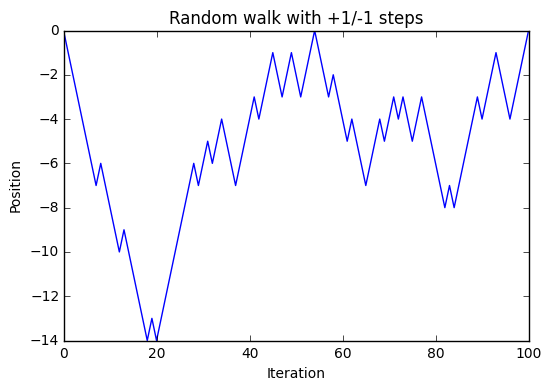

In [264]:
position = 0
walk = [position]
steps = 100
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
plt.plot(walk)
plt.title('Random walk with +1/-1 steps')
plt.xlabel('Iteration'); plt.ylabel('Position')
plt.show()

In [270]:
num_steps = 100
draws = np.random.randint(0,2, size=num_steps)
steps = np.where(draws>0, 1, -1)
walk = steps.cumsum()

A more complicated statistic is the first crossing time, the step at which the random walk reaches a particular value. 
Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction.  
`np.abs(walk) >= 10` gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the first 10 or -10.   
Turns out this can be computed using `argmax()`, which returns the first index of the maximum value in the boolean array ( True is the maximum value):

In [271]:
(np.abs(walk)>=10).argmax()

25

**Note**  
Using argmax here is not always efficient because it always makes a full scan of the array.  
In this special case once a True is observed we know it to be the maximum value.

## Simulating multiple random walks at once

In [276]:
num_walks, num_steps = 5000, 1000
draws = np.random.randint(0,2,size=(num_walks, num_steps))
steps = np.where(draws>0, +1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   1, ..., -28, -29, -28],
       [  1,   2,   1, ...,  62,  63,  64],
       [  1,   2,   1, ..., -18, -19, -18],
       ..., 
       [  1,   2,   1, ..., -18, -19, -18],
       [  1,   2,   3, ...,  24,  23,  22],
       [ -1,   0,  -1, ...,  62,  61,  62]])

Minimum crossing time to 30 or -30

In [282]:
hits_30 = (np.abs(walks)>=30).any(1)
hits_30

array([ True,  True, False, ...,  True,  True,  True], dtype=bool)

In [283]:
np.abs(walks[hist_30] >= 30).argmax(1)

array([  0, 551,   0, ...,   0, 989, 625])

# Perf considerations

[Perf consideration: zeros vs repeat](http://stackoverflow.com/a/27582592/5510350)

> Are you using Linux? Linux has lazy allocation of memory. The underlying calls to malloc and calloc in numpy always 'succeed'. No memory is actually allocated until the memory is first accessed.

> The zeros function will use calloc which zeros any allocated memory before it is first accessed. Therfore, numpy need not explicitly zero the array and so the array will be lazily initialised. Whereas, the repeat function cannot rely on calloc to initialise the array. Instead it must use malloc and then copy the repeated to all elements in the array (thus forcing immediate allocation).

[Perf consideration: zeros, zeros_like](http://stackoverflow.com/a/27464738/5510350)

My timings in Ipython are (with a simplier timeit interface):

```
In [57]: timeit np.zeros_like(x)
1 loops, best of 3: 420 ms per loop

In [58]: timeit np.zeros((12488, 7588, 3), np.uint8)
100000 loops, best of 3: 15.1 µs per loop
```

When I look at the code with IPython (np.zeros_like??) I see:

```python
res = empty_like(a, dtype=dtype, order=order, subok=subok)
multiarray.copyto(res, 0, casting='unsafe')
```

while `np.zeros` is a blackbox - pure compiled code.

Timings for empty are:

```
In [63]: timeit np.empty_like(x)
100000 loops, best of 3: 13.6 µs per loop

In [64]: timeit np.empty((12488, 7588, 3), np.uint8)
100000 loops, best of 3: 14.9 µs per loop
```

So the extra time in zeros_like is in that copy.

In my tests, the difference in assignment times (x[]=1) is negligible.

My guess is that zeros, ones, empty are all early compiled creations.  empty_like was added as a convenience, just drawing shape and type info from its input.  zeros_like was written with more of an eye toward easy programming maintenance (reusing empty_like) than for speed.

np.ones and np.full also use the np.empty ... copyto sequence, and show similar timings.

https://github.com/numpy/numpy/blob/master/numpy/core/src/multiarray/array_assign_scalar.c appears to be file that copies a scalar (such as 0) to an array. I don't see a use of memset.

https://github.com/numpy/numpy/blob/master/numpy/core/src/multiarray/alloc.c has calls to malloc and calloc.

https://github.com/numpy/numpy/blob/master/numpy/core/src/multiarray/ctors.c - source for zeros and empty. Both call PyArray_NewFromDescr_int, but one ends up using npy_alloc_cache_zero and the other npy_alloc_cache.

npy_alloc_cache in alloc.c calls alloc.  npy_alloc_cache_zero calls npy_alloc_cache followed by a memset. Code in alloc.c is further confused with a THREAD option.

More on the calloc v malloc+memset difference at: Why malloc+memset is slower than calloc?

But with caching and garbage collection, I wonder whether the calloc/memset distinction applies.

This simple test with the memory_profile package supports the claim that zeros and empty allocate memory 'on-the-fly', while zeros_like allocates everything up front:

N = (1000, 1000) 
M = (slice(None, 500, None), slice(500, None, None))


|Line |    Mem usage | Increment |  Line Contents |
| --  |   ---------- | --------- | -------------- |
| 2  |   17.699 MiB |    0.000 MiB |  @profile |
| 3  |              |              |   def test1(N , M): |
| 4  |   17.699 MiB |    0.000 MiB |   print(N, M) | 
| 5  |   17.699 MiB |    0.000 MiB |      x = np.zeros(N)   # no memory jump |
| 6  |   17.699 MiB |    0.000 MiB |      y = np.empty(N) |
| 7  |   25.230 MiB |    7.531 MiB |      z = np.zeros_like(x) # initial jump |
| 8  |   29.098 MiB |    3.867 MiB |      x[M] = 1     # jump on usage |
| 9  |   32.965 MiB |    3.867 MiB |      y[M] = 1 |
| 10 |   32.965 MiB |    0.000 MiB |      z[M] = 1 |
| 11 |   32.965 MiB |    0.000 MiB |      return x,y,z |